# LAB 1: Introduction to Pytorch and Neural Networks

### Giorgio Lazzarinetti - My Contacts
For any questions or doubts you can find my contacts here:

<p align="center">

giorgiolazzarinetti@gmail.com
g.lazzarinetti@campus.unimib.it 

</p>

### Notebook Outline

* PyTorch - tensors and basic operations;
* Neural Networks in PyTorch;

## PyTorch

[PyTorch](https://pytorch.org/) is amongst the most widely used libraries for performing machine learning research and numerical computations. PyTorch is similar to NumPy, with the additional benefit that PyTorch allows you to perform your computations on CPUs and GPUs without any change to your code. PyTorch also makes it easy to distribute your computation across multiple devices or machines. One of the most important features of PyTorch is automatic differentiation. It allows computing the gradients of your functions analytically in an efficient manner which is crucial for training machine learning models using gradient descent method. 

So, we will now see these PyTorch useful classes:

  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

In [ ]:
a= 3
a

3

### Packages

In [ ]:
%matplotlib inline

import random
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm


import torch
import torch.nn as nn
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# set the seed for reproducibility: built-in python, numpy, and pytorch
seed = 172
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed) # works for all devices (CPU and GPU)

In [ ]:
device = torch.device('cpu')
#device = torch.device('cuda') # Uncomment this to run on GPU

### What is a tensor?

Tensors are simply multidimensional arrays

* A scalar (a number) is a $0-dim$ array;
* a vector is a $1-dim$ array;
* a matrix is a $2-dim$ array;
* ...

<center>  <img src="https://drive.google.com/uc?export=view&id=1BvK6ZGM7x_8x2LRfoVXvpaIE_mTycWqe" width="650" height="400"> </center> 



Like NumPy, PyTorch provides its own multidimensional array class, called `Tensor`. `Tensors` are essentially the equivalent of NumPy `ndarrays`. We can say that:

* `Tensor` draws a lot of methods from NumPy
* `Tensor` has CUDA support

In [ ]:
# torch.tensor vs np.array
x = torch.tensor([[1.1,5,4],[3,2,1]])

y = np.array([[1.1,5,4],[3,2,1]])

x.dtype, y.dtype

(torch.float32, dtype('float64'))

`torch` already thinks with Machine Learning in mind as the Tensor is implicitly converted to dtype float32, while NumPy makes no such assumption. Since in deep learning memory is always a bottleneck. Especially when you are dealing with large volume of data and using a GPU with limited memory. I would recommend using `tf.float32` for a better speed with the price of a possible negligible loss of precision.

For more info on Tensor data types, check [this page](https://pytorch.org/docs/stable/tensors.html).

Note that if we put integers, torch.tensor infers the type

As in NumPy, we can call the `.shape` attribute to get the shape of the structures. Moreover, Tensors have also the `.size()` method which is analogous to `.shape`.

In [ ]:
#let's go step by step
s = torch.tensor(1)
v = torch.tensor([1,2,3])
m = torch.tensor([[1,2], [3,4]])
t = torch.tensor([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])

print(s)
print(v)
print(m)
print(t)

tensor(1)
tensor([1, 2, 3])
tensor([[1, 2],
        [3, 4]])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


In [ ]:
s.shape, v.shape, m.size(), t.size() 
#equivalent to s.shape, v.shape, m.shape, t.shape

(torch.Size([]), torch.Size([3]), torch.Size([2, 2]), torch.Size([2, 2, 3]))

In [ ]:
# generate random tensor
d = torch.rand([3, 3, 4])  
d

tensor([[[0.2469, 0.2080, 0.8997, 0.9753],
         [0.8461, 0.7945, 0.9302, 0.0049],
         [0.4042, 0.1300, 0.2102, 0.9829]],

        [[0.0334, 0.4363, 0.3250, 0.3079],
         [0.2295, 0.1500, 0.6592, 0.3632],
         [0.8722, 0.0489, 0.3148, 0.4832]],

        [[0.0953, 0.2106, 0.8527, 0.2870],
         [0.6727, 0.0772, 0.1950, 0.7856],
         [0.5628, 0.3543, 0.9807, 0.0153]]])

In [ ]:
#slice of a tensor
t3 = torch.tensor([[[0,1,2],[3,4,5]],    [[6,7,8],[9,10,11]],    [[13,14,15],[16,17,18]],     [[19,20,21],[22,23,24]]])
print(t3.size())

# Select some slices
# Ex: from axis-0 select the first 2 out of 4 elements, from axis-1 the last element, from axis-2 the first two.
t3[0:2, 1:2,  0:2]

torch.Size([4, 2, 3])


tensor([[[ 3,  4]],

        [[ 9, 10]]])

### Operation with Tensors

Matrix Multiplication and algebric operation

In [ ]:
z1 = torch.tensor([[0,1], [2,3], [4,5], [6,7], [8, 9]])
z2 = torch.tensor([[0, 1, 2], [2, 3, 4]])

# first way
print(z1 @ z2, "Matrix multiplication: with '@'")

# second way
print(torch.matmul(z1, z2), "Matrix multiplication: with torch.matmul")

# third way
print(z1.matmul(z2), "Matrix multiplication: with Tensor.matmul")

tensor([[ 2,  3,  4],
        [ 6, 11, 16],
        [10, 19, 28],
        [14, 27, 40],
        [18, 35, 52]]) Matrix multiplication: with '@'
tensor([[ 2,  3,  4],
        [ 6, 11, 16],
        [10, 19, 28],
        [14, 27, 40],
        [18, 35, 52]]) Matrix multiplication: with torch.matmul
tensor([[ 2,  3,  4],
        [ 6, 11, 16],
        [10, 19, 28],
        [14, 27, 40],
        [18, 35, 52]]) Matrix multiplication: with Tensor.matmul


In [ ]:
#Don't mistake `@` and `*` as the latter is the Hadamard (element-by-element) product!

z1*z1
#z1 * z2 # this gives an Exception

tensor([[ 0,  1],
        [ 4,  9],
        [16, 25],
        [36, 49],
        [64, 81]])

In [ ]:
z3 = torch.Tensor([[2,4,6,8,7],[1,3,5,7,9]])
z4 = torch.Tensor([[2,2,2,2,2],[1,1,1,1,1]])

print(z3 % z4, "z1 % z3 (remainder of integer division)")
print(z3 // z4, "z3 // z1 (integer division)") 

tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.]]) z1 % z3 (remainder of integer division)
tensor([[1., 2., 3., 4., 3.],
        [1., 3., 5., 7., 9.]]) z3 // z1 (integer division)


One important aspect to keep in mind is that a tensor has several dimensions, so we need to specify along what specific axis we want to perform our operation.

In [ ]:
t4 = torch.tensor([[0,1], [2,3]])

print('Sum along axis 0: ', torch.sum(t4, axis=0))
print('Sum along axis 1: ', torch.sum(t4, axis=1))
# axis -1 is the inner one
print('Sum along axis -1: ', torch.sum(t4, axis=-1))

Sum along axis 0:  tensor([2, 4])
Sum along axis 1:  tensor([1, 5])
Sum along axis -1:  tensor([1, 5])


In [ ]:
#Normalization
z3 = torch.Tensor([[2,4,6,8,10],[1,3,5,7,9]])

z3_norm = z3.norm() # equivalent z3.norm(dim=1)
# np.sqrt(2**2+4**2+6**2+8**2+10**2 + 1**2+3**2+5**2+7**2+9**2)
z3_norm 

tensor(19.6214)

In [ ]:
z3_norm = z3.norm(dim=0)
z3_norm

tensor([ 2.2361,  5.0000,  7.8102, 10.6301, 13.4536])

To "disentangle" the scalar from a Tensor use the .item() method.

In [ ]:
z3_norm[0].item()

2.2360680103302

Transposition

In [ ]:
z1 = torch.rand([4, 5])
print("z1")
print("shape", z1.shape)
print(z1)

# transposition
z2 = z1.T

print("\nz2")
print("shape", z2.shape)
print(z2)

z1
shape torch.Size([4, 5])
tensor([[0.7193, 0.6900, 0.6834, 0.6598, 0.5051],
        [0.7663, 0.1960, 0.0260, 0.9323, 0.7474],
        [0.5106, 0.6668, 0.4287, 0.6666, 0.0378],
        [0.9355, 0.1507, 0.3571, 0.9671, 0.9202]])

z2
shape torch.Size([5, 4])
tensor([[0.7193, 0.7663, 0.5106, 0.9355],
        [0.6900, 0.1960, 0.6668, 0.1507],
        [0.6834, 0.0260, 0.4287, 0.3571],
        [0.6598, 0.9323, 0.6666, 0.9671],
        [0.5051, 0.7474, 0.0378, 0.9202]])


Vector Multiplication

In [ ]:
vec1 = torch.rand((5,)) # torch.tensor([1,2,3])
vec2 = torch.rand((5,)) # torch.tensor([4,5,6])

print(vec1, "vec1")
print(vec2, "vec2")

print(vec1 @ vec2, "I can use '@' even if the two vectors aren't conformable")

print(vec1.unsqueeze(1).shape)
print(vec1.unsqueeze(0) @ vec2.unsqueeze(-1))

print(torch.matmul(vec1, vec2))

print(torch.dot(vec1, vec2))

tensor([0.8405, 0.6265, 0.4037, 0.7775, 0.7534]) vec1
tensor([0.5441, 0.0624, 0.4961, 0.8666, 0.0769]) vec2
tensor(1.4284) I can use '@' even if the two vectors aren't conformable
torch.Size([5, 1])
tensor([[1.4284]])
tensor(1.4284)
tensor(1.4284)


Conversion PyTorch <-> Numpy

In [ ]:
y_numpy = np.random.rand(3,5)
y_torch = torch.from_numpy(y_numpy)
print(y_torch, "y converted to torch.Tensor")

x = torch.rand(6,4)
x_numpy = x.numpy()
print(x_numpy, "x converted to numpy.ndarray")

tensor([[0.1494, 0.1246, 0.3197, 0.6755, 0.6110],
        [0.8797, 0.3087, 0.3216, 0.2548, 0.4557],
        [0.6909, 0.7239, 0.1488, 0.6752, 0.1511]], dtype=torch.float64) y converted to torch.Tensor
[[0.8957058  0.23139244 0.07630104 0.15985751]
 [0.63829154 0.24363631 0.07895219 0.27063715]
 [0.0821569  0.37729287 0.34379584 0.7756635 ]
 [0.6334905  0.8696552  0.55637306 0.46875453]
 [0.21254295 0.83155376 0.9187102  0.10769898]
 [0.66605157 0.6881105  0.38007623 0.73576784]] x converted to numpy.ndarray


### Automatic Differentiation

One of the advantage of PyTorch over NumPy is its automatic differentiation which is very useful in optimization applications, such as neural network backpropagation. 

#### Example 1 (simple)

Suppose to have a composite function which is a chain of two functions: g(u(x)). To compute the derivative of g with respect to x we can use the chain rule: 

$$\frac{dg}{dx} = \frac{dg}{du} \cdot \frac{du}{dx}$$

PyTorch can analytically compute the derivatives for us.

To compute the derivatives in PyTorch first we create a tensor and set its `requires_grad = true`. We can use tensor operations to define our functions. Let us give the following example

In [ ]:
x = torch.tensor(0.5, requires_grad=True)

def u(x):
  return x * x

def g(u):
  return -2*u

Our composite function is $g(x) = -2 x^2$, whose derivative is $dg/dx = - 4 x$. At the point $x = 0.5$ its value is $-2$. Let us check this result

In [ ]:
dg_dx = torch.autograd.grad(g(u(x)), x)[0]
print(dg_dx) 

tensor(-2.)


## Neural Networks (nn.Module)

The MLP is a family of Artificial NNs in which the input is a vector of size $ℝ^d$ and the output is again a vector of size $ℝ^p$, where p is determined upon the nature of the problem we wish to solve (for instance it might be the number of classes). Additionally, a MLP is characterized by multiple stages (layers) of sequential vector-matrix multiplication and non-linearity in which each output of the layer $l-1$ acts as input to the layer $l$.


In NNs, each of the nodes within the graph is called a **neuron**. They are organized in **layers**. The first layer is called **input layer** and represents the dimensions of our data. The last layer is called output layer and represent the **output** of our NN. The intermediate layers are called **hidden layers**. 


<center>  <img src="https://drive.google.com/uc?export=view&id=12__R5BwhndZ7qSvZx2ntv2pncIfkj-Uo" width="550" height="320"> </center> 

If the NN is an MLP, each neuron in a given layer (except for the input) receives information from every neuron of the previous; moreover, each neuron in any layer (except for the output) sends information to every neuron of the next layer. There is no communication between neurons of the same layer (This happens in Recursive NNs such as Recurret NNs).

### Activation Functions

To solve non-linear problems (99% of real-world problems) we need non-linear activation functions. There are plenty of activation functions in the literature. The choice of the more suited activation function for a network or a specific layer depends on many factors, such as the task itself. In this course, we will not deal with these design settings. For this exercise, we will use some common choice: *logistic sigmoid activation function* and *hyperbolic tangent activation function*. They have similar properties and, for this reason, the latter is often called *scaled sigmoid*. 

These functions:

* are non linear in nature;

* they have activations bounded;

* between $x$ values $-2$ to $2$, $y$ values are very steep. Which means, any small changes in the values of $x$ in that region will cause values of $y$ to change significantly. Outside this range, $y$ values tend to respond very less to changes in $x$. This can cause an effect named *vanishing of gradients*;

* tend to bring the activations to either side of the curve. In particular when used in the last layer, they are suited for binary classifiation problems making clear distinctions on prediction.


We will also consider the widely used *ReLu activation* (Rectified Linear Unit). It is also a non-linear function, but it is not bounded. This means it can blow up the activation. Moreover, it is worth highlighting the sparsity of its activation. If we consider a neural network with a lot of neurons, using a *sigmoid* or *tanh* will cause almost all neurons to fire in an analog way. That means almost all activations will be taken into account and processed to describe the output of a network. We say that the activation is dense. This could be costly. Ideally, we would want a few neurons in the network to not activate and thereby making the activations sparse and efficient.


Logistic regression is usually used as a binary classification model instead of a regression model. In this setting, we suppose we have two destination classes to which we assign values 0 and 1: $y ∈ {0, 1}$. Since the codomain of the sigmoid is $[0,1]$, we can interpret its output $ŷ$ as a probability value, and assign each data to the class 0 if $ŷ <= 0.5$, to the class 1 otherwise.

In [ ]:
# Scaled Sigmoid Activation Function
def tanh(x):
    return np.tanh(x)
# Its derivative
def d_tanh(x):
    return 1 - np.tanh(x) ** 2

# Logistic Activation Function, also called Sigmoid
# (is this one torch.nn.functional.sigmoid)
def logistic(x):
    return 1/(1 + np.exp(-1*x))
# Its derivative
def d_logistic(x):
    return logistic(x) * ( 1 - logistic(x) )

# ReLu Activation Function
def relu(x):
  return (np.abs(x) + x)*0.5
# Its derivative
def d_relu(x):
    x= np.array(x)
    return np.where(x > 0, 1, 0)

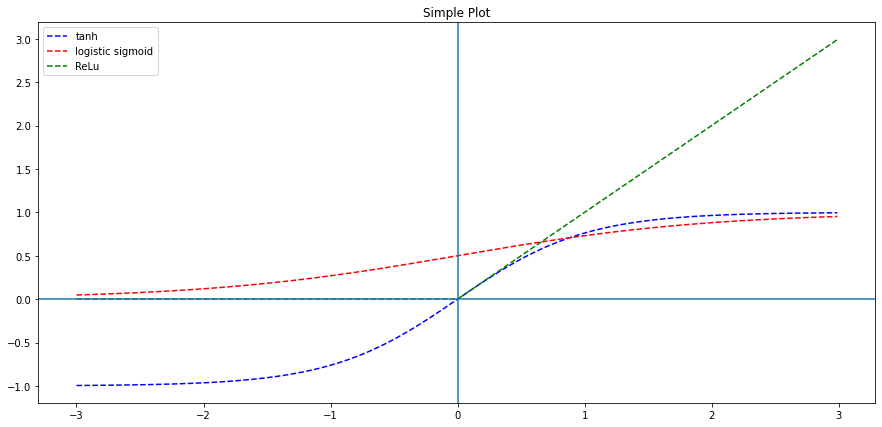

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

# evenly sampled time at 200ms intervals
t = np.arange(-3., 3., 0.01)

# red dashes, blue squares and green triangles
plt.plot(t, tanh(t), 'b--', label='tanh')
plt.plot(t, logistic(t), 'r--', label='logistic sigmoid')
plt.plot(t, relu(t), 'g--', label='ReLu')


plt.title("Simple Plot")

plt.axvline(0)
plt.axhline(0)

plt.legend()
plt.show()

We define our neural network by subclassing `nn.Module`. This way to define a NN it allows us to better customize our model. Every nn.Module subclass implements the operations on input data in the forward method.


We will now be exploring built-in structures and routines supporting the creation of ML models.

Usually, a PyTorch model is a class inheriting from `torch.nn.Module`. This way to define a NN it allows us to better customize our model. Inside `torch.nn.Module` class, we'll define two methods:

* the constructor `(__init__)` in which we define the building blocks of our model as class variables 
* the `forward` method, which specifies how the data fed into the model needs to be processed in order to produce the output

We don't need to define backward methods since we're constructing our model with built-in PyTorch building blocks. PyTorch automatically creates a backward routine based upon the forward method.

Our model will be built by stacking different linear layers and activating them with tanh function. The Linear layer processes its input as $XW + b$ which is exactly the equation of a linear regressor. 



$$
\begin{pmatrix} 
w_{00} & w_{01} \\
w_{10} & w_{11} 
\end{pmatrix}\cdot
\begin{pmatrix} 
x_1  \\
x_2 
\end{pmatrix}
+
\begin{pmatrix} 
b_0  \\
b_1  
\end{pmatrix}
$$

In [ ]:
class UniversalApprox(nn.Module):
  def __init__(self, num_units, dropout_rate):
    super().__init__()

    self.num_units = num_units
    self.dropout_rate = dropout_rate

    # dropout is a function that takes as input activations from the previous layer and
    # sets some of them at zero, according to the dropout rate value.

    self.dense1 = nn.Linear(1, self.num_units, bias=True)
    self.dense2 = nn.Linear(self.num_units, int(self.num_units), bias=True)
    self.dense3 = nn.Linear(int(self.num_units), int(self.num_units / 2), bias=True)
    self.dense4 = nn.Linear(int(self.num_units/ 2), 1, bias=True)
    self.droput = nn.Dropout(p = self.dropout_rate)

  def forward(self, x):
    result = torch.tanh(self.dense1(x))
    result = self.droput(result)
    result = torch.tanh(self.dense2(result))
    result = self.droput(result)
    result = torch.tanh(self.dense3(result))
    result = self.droput(result)
    result = torch.tanh(self.dense4(result))
    return result

    #-----------------------------------------------------#
    #                   A custom method
    #-----------------------------------------------------#
    def extract_lin1(self, x):
        '''
        Extracts the activations of the first hidden layer
        '''
       
        return self.dense1(x)

In [ ]:
# We can also create a Custom Layer by subclassing the nn.Module

class MyLinearLayer(nn.Module):
    """ Custom Linear layer"""
    # it needs to have at least a constructor and a forward method, just like an MLP
    def __init__(self, size_in = 100, size_out = 30):
        super(MyLinearLayer, self).__init__()

        self.size_in, self.size_out = size_in, size_out

        #define layer dimensions
        weights = torch.Tensor(size_in, size_out) 
        self.W = nn.Parameter(weights, requires_grad=True)
        #initilize weigths
        torch.nn.init.normal_(self.W, mean=0.0, std=1.0)

    def forward(self, x):
        out = torch.mm(x, self.W)
        #out = numpy.mm(x, self.W)
        return out 

Let's create an instance of the model and inspect the parameters

In [ ]:
model = UniversalApprox(num_units = 64, dropout_rate = .2)
model.to(device)

UniversalApprox(
  (dense1): Linear(in_features=1, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=64, bias=True)
  (dense3): Linear(in_features=64, out_features=32, bias=True)
  (dense4): Linear(in_features=32, out_features=1, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)

In [ ]:
input_size = (1,)
summary(model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             128
           Dropout-2                   [-1, 64]               0
            Linear-3                   [-1, 64]           4,160
           Dropout-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
           Dropout-6                   [-1, 32]               0
            Linear-7                    [-1, 1]              33
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: dense1.weight | Size: torch.Size([64, 1]) | Values : tensor([[-0.1123],
        [-0.4164]], grad_fn=<SliceBackward0>) 

Layer: dense1.bias | Size: torch.Size([64]) | Values : tensor([-0.2935, -0.7511], grad_fn=<SliceBackward0>) 

Layer: dense2.weight | Size: torch.Size([64, 64]) | Values : tensor([[ 0.1032, -0.0921,  0.0704,  0.0495, -0.0173, -0.0482,  0.1030,  0.1131,
          0.0591, -0.0040,  0.0373, -0.1039,  0.0790, -0.0775,  0.0148,  0.0187,
          0.0147,  0.1151, -0.0227, -0.0899,  0.0607, -0.1079, -0.0223,  0.0930,
          0.0925, -0.0935,  0.0062,  0.1130,  0.0516, -0.0310,  0.1214,  0.0356,
          0.0183,  0.0140, -0.0748,  0.0720,  0.0596,  0.0869, -0.0016,  0.0438,
          0.0210, -0.1065,  0.0063,  0.0120, -0.0182,  0.0092,  0.1183,  0.0888,
         -0.0715, -0.0200, -0.0690, -0.0941, -0.0363, -0.0265,  0.0763,  0.0976,
          0.0029, -0.0813, -0.0314,  0.0858,  0.1061, -0.1016,  0.0159, -0.0392],
        [-0.0993,  0.0218, -0.0329,  0.0878,  0.0017,

We can also use the untrained model to produce an output based on the random initialization of the weights. The forward method gets implicitly called by passing the data to our model's instance model:

In [ ]:
x = torch.randn(10, 1, device=device)
y_pred = model(x)
print(f"Model output: {y_pred}")

Model output: tensor([[-0.1179],
        [-0.2154],
        [-0.1919],
        [-0.1840],
        [-0.0371],
        [-0.1396],
        [-0.2601],
        [-0.2012],
        [-0.2072],
        [-0.1424]], grad_fn=<TanhBackward0>)


### Create Dataset
We now create a dataset by using simple mathematical function and we fed it inot a TensorDataset which is then consumed by the DataLoader during training. 

**DataLoader** combines a dataset and a sampler, and provides an iterable over the given dataset. The idea behind the DataLoader is to load your data using multiprocessing (and pinned memory) to asynchronously push your data batch onto the GPU during training so that you can basically hide the data loading time.

**TensorDataset** is a convenient method to wrap already loaded tensors into a Dataset.

In [ ]:
num_samples = 256

train_inputs = torch.rand(num_samples)
noise = torch.randn(num_samples)

train_targets = torch.sin(8*train_inputs) + .7*noise

#for validation
valid_inputs = torch.rand(num_samples)
valid_targets = torch.sin(8*valid_inputs) + .7*noise

In [ ]:
assert train_inputs[0] != valid_inputs[0]
assert train_targets[0] != valid_targets[0]

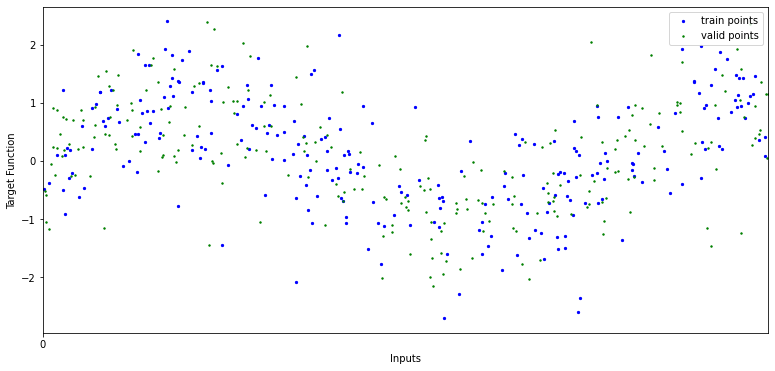

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

ax.scatter(train_inputs, train_targets, c='b', s=5, label='train points')
ax.scatter(valid_inputs, valid_targets, c='g', s=2, label='valid points')
ax.set_xticks(range(0, 1))
plt.xlim(0, 1)
ax.set_xlabel('Inputs')
ax.set_ylabel('Target Function')
#ax.set_title(f'Distribution of sum of two different dices')
ax.legend(loc='upper right')
plt.show()

In [ ]:
train_dataloader = DataLoader(TensorDataset(train_inputs, train_targets), batch_size= 256, shuffle=True)
valid_dataloader = DataLoader(TensorDataset(valid_inputs, valid_targets), batch_size= 256, shuffle=True)

### Training Step
Now we define a training function that we will apply to each model. However, we must before explain an important detail. When our models have dropout or batch-normalization layers, it becomes important to specify if the model is in training or evaluation mode. During the former, these layers must be activated while during the latter they must be turned off. 

By default all the modules are initialized to train mode (self.training = True), but from now on we will always esplicitely set the training mode with `model.train()`(it is a good practice). When your model has dropout or batchnorm, you must set `model.eval()` before performing evaluation/inference.

It is worth noticing that `model.train()` and `model.eval()` do not change any behavior of the gradient calculations, but they only change the forward behaviour setting specific layers like dropout and batchnorm to evaluation mode.


### The Training Loop

Setup the training (learning) procedure:

0.   **Define the neural network** that has some learnable parameters, called wieghts;
2.   **Forward pass:** the input (or a batch of inputs) is processed through the network. The model makes a guess about the output.

3.   **Loss function evaluation:** Loss Function is computed on data at step N (how far is the output from being correct?);
4.   **Backward pass:** collects the derivatives of the loss function (gradients) with respect to its parameters (weights and bias);
5.   **Optimizes parameters** using gradient descent. Update network params: $\theta_N = \theta_{N-1} - \alpha \frac{d L}{d \theta}$;

You can check out [here](https://www.youtube.com/watch?v=tIeHLnjs5U8) a video on backpropagation!

In [ ]:
model = UniversalApprox(num_units = 64, dropout_rate = .2)
model.to(device)

UniversalApprox(
  (dense1): Linear(in_features=1, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=64, bias=True)
  (dense3): Linear(in_features=64, out_features=32, bias=True)
  (dense4): Linear(in_features=32, out_features=1, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)

In [ ]:
def plot_loss(training_loss, validation_loss):
  plt.plot(range(len(training_loss)), training_loss, c='b', label='Loss Training')
  plt.plot(range(len(validation_loss)), validation_loss, c='r', label='Loss Validation')
  plt.ylim(0.4, 0.8)
  plt.show()

Training model ...

 epoch 0
-- train loss 0.96, validation loss 0.943

 epoch 50
-- train loss 0.928, validation loss 0.896

 epoch 100
-- train loss 0.924, validation loss 0.888

 epoch 150
-- train loss 0.916, validation loss 0.884

 epoch 200
-- train loss 0.919, validation loss 0.882

 epoch 250
-- train loss 0.916, validation loss 0.88

 epoch 300
-- train loss 0.905, validation loss 0.879

 epoch 350
-- train loss 0.917, validation loss 0.878

 epoch 400
-- train loss 0.911, validation loss 0.876

 epoch 450
-- train loss 0.892, validation loss 0.874

 epoch 500
-- train loss 0.895, validation loss 0.872

 epoch 550
-- train loss 0.918, validation loss 0.869

 epoch 600
-- train loss 0.91, validation loss 0.866

 epoch 650
-- train loss 0.895, validation loss 0.863

 epoch 700
-- train loss 0.871, validation loss 0.859

 epoch 750
-- train loss 0.881, validation loss 0.854

 epoch 800
-- train loss 0.896, validation loss 0.847

 epoch 850
-- train loss 0.884, validation loss 0.8

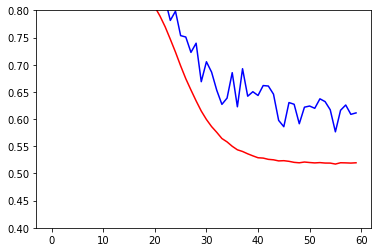

Loss Diff -0.09764504432678223


In [ ]:
# Settings
num_epochs = 3000 #8000
learning_rate = 0.0001 #0.0001

def training_step(net, criterion, optimizer):
    # set the model to train mode
    running_loss=0
    net.train()
    for batch_idx, (x, y) in enumerate(train_dataloader): # avoid for loop when batch is equal to input data size
      # add one dimension
      x = x.view(-1, 1) 
      y = y.view(-1, 1) 

      # transfer to device
      x, y = x.to(device), y.to(device)

      #forward pass 
      model_pred = net(x)

      #loss function evaluation
      loss = criterion(model_pred, y)

      #initialize optimizer
      optimizer.zero_grad()

      # Backward pass: compute gradient of the loss with respect to model
      # parameters
      loss.backward()

      # Calling the step function on an Optimizer makes an update to its
      # parameters
      optimizer.step()

      running_loss+=loss.item()

    return running_loss/(batch_idx+1)

def validation_step(net, criterion, optimizer):

    running_loss=0
    # set the model to train mode
    net.eval()
    for batch_idx, (x, y) in enumerate(valid_dataloader): # avoid for loop when batch is equal to input data size
      
      # add one dimension
      x = x.view(-1, 1) 
      y = y.view(-1, 1) 

      # transfer to device
      x, y = x.to(device), y.to(device)

      # While, we are performing inference, we don't compute gradients, and thus, don't need to cache these values. 
      # Infact, no graph needs to be create during inference as it will lead to useless consumption of memory.

      with torch.no_grad():
        model_pred = net(x)

        loss = criterion(model_pred, y)

        running_loss+=loss.item()
    return running_loss/(batch_idx+1)


model_dict = {'model': model}


for model in model_dict.keys():
  print('Training {} ...'.format(model))
  criterion = nn.MSELoss(reduction = 'mean')
  optimizer = torch.optim.Adam(model_dict[model].parameters(), lr=learning_rate)

  tr_loss, va_loss = [], []

  for epoch in range(num_epochs):
    tr_loss_step = training_step(model_dict[model], criterion = criterion, optimizer = optimizer)
    if epoch % 50 == 0:
      va_loss_step = validation_step(model_dict[model], criterion = criterion, optimizer = optimizer)
      va_loss.append(va_loss_step)
      tr_loss.append(tr_loss_step)
      print(f'\n epoch {epoch}')
      print(f'-- train loss {tr_loss_step:.3}, validation loss {va_loss_step:.3}')


  plot_loss(tr_loss, va_loss)
  loss_diff = np.array(va_loss)- np.array(tr_loss)
  print('Loss Diff', np.mean(loss_diff[-10:]))

In [ ]:
all_preds = []

for model in model_dict.keys():
  # Disabling gradient calculation is useful for inference, since it will reduce memory 
  # consumption for computations that would otherwise have requires_grad=True.
  with torch.no_grad(): 
    model_dict[model].eval()
    pred = model_dict[model](train_inputs.view(-1,1).to(device)).detach().to('cpu')
    all_preds.append(pred)

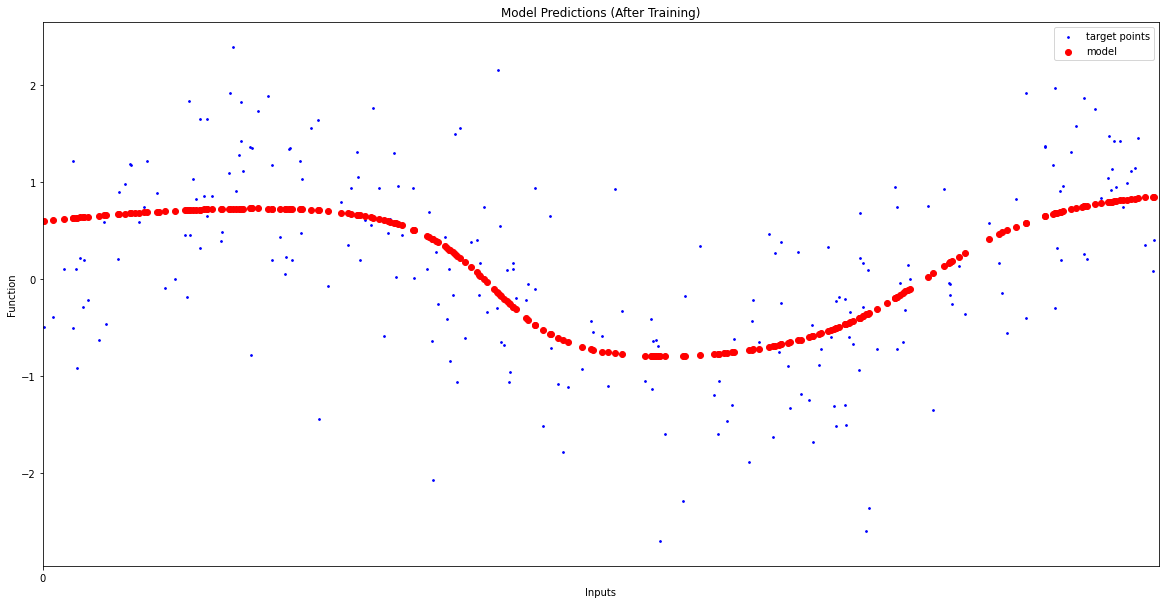

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

#pred_over = np.load('./overfitted_model.npy')
#pred_corr = np.load('./correct_model.npy')

ax.scatter(train_inputs, train_targets, c='b', s=3, label='target points')
for i, model in enumerate(model_dict.keys()):
  colors = ['r', 'm', 'g', 'k']
  ax.scatter(train_inputs, all_preds[i], c=colors[i], label=model)
  #ax.scatter(train_inputs, all_preds[1], c='m', s=5, label='model 2')
  #ax.scatter(inputs, all_preds[2], c='g', s=5, label='model 3')

ax.set_xticks(range(0, 1))
plt.xlim(0, 1)
ax.set_xlabel('Inputs')
ax.set_ylabel('Function')
ax.set_title(f'Model Predictions (After Training)')
ax.legend(loc='upper right')
plt.show()

### Saving and Loading Parameters

We can now save model parameter to reload the model for prediction or also to try retrain the network starting from a given initialization

In [ ]:
import os
folder_save = "models/mlp_init"
os.makedirs(folder_save, exist_ok=True)
filename = os.path.join(folder_save, "model.pt")
torch.save(model_dict['model'].state_dict(), filename)

We can now initialize a new instance of the class UniversaApprox(). check the params and load the previously trained parameters

In [ ]:
model = UniversalApprox(num_units = 64, dropout_rate = .2)

for params in model.parameters():
  print(params)


Parameter containing:
tensor([[-0.3081],
        [ 0.6557],
        [-0.8875],
        [-0.5079],
        [ 0.5524],
        [-0.6281],
        [-0.0298],
        [ 0.4836],
        [ 0.2976],
        [ 0.2665],
        [ 0.8832],
        [ 0.5715],
        [-0.9274],
        [ 0.7566],
        [-0.9225],
        [ 0.7521],
        [-0.3207],
        [-0.6640],
        [ 0.0126],
        [-0.2778],
        [-0.5430],
        [ 0.7430],
        [-0.9400],
        [-0.0470],
        [-0.7068],
        [-0.8540],
        [-0.5328],
        [-0.7352],
        [-0.7422],
        [-0.3468],
        [-0.6359],
        [-0.5490],
        [ 0.9388],
        [ 0.4806],
        [ 0.4520],
        [-0.8474],
        [-0.7923],
        [-0.4025],
        [-0.8117],
        [-0.1954],
        [-0.7173],
        [ 0.3971],
        [-0.8141],
        [-0.9292],
        [ 0.3402],
        [ 0.1910],
        [-0.4035],
        [-0.2818],
        [-0.0472],
        [-0.9142],
        [-0.5341],
        [

In [ ]:
#load the previously trained parameter and check the differences
model.load_state_dict(torch.load(filename))

for params in model.parameters():
  print(params)

Parameter containing:
tensor([[ 0.0561],
        [-1.0856],
        [-0.6020],
        [-0.4193],
        [-0.1247],
        [-0.9925],
        [ 0.4320],
        [ 0.7295],
        [-0.1960],
        [-0.8094],
        [-1.0183],
        [-0.2391],
        [-1.0752],
        [ 0.7340],
        [-0.6300],
        [-1.0852],
        [ 0.8714],
        [ 1.0085],
        [ 0.1655],
        [-0.3964],
        [-0.5916],
        [-0.0886],
        [-0.7430],
        [ 0.1766],
        [-0.2120],
        [ 0.3701],
        [ 0.0809],
        [-1.0299],
        [-0.3047],
        [ 0.9986],
        [-0.8618],
        [-0.2024],
        [-0.2377],
        [-0.2330],
        [-0.7136],
        [ 0.3924],
        [-0.8920],
        [ 0.3849],
        [ 0.7585],
        [-0.5092],
        [ 0.3021],
        [ 0.8978],
        [ 0.3039],
        [ 0.9561],
        [ 0.8579],
        [ 1.0860],
        [ 0.5772],
        [-0.0151],
        [-0.6103],
        [ 0.4995],
        [ 0.3766],
        [

### EXERCISE

When training neural networks, our models are prone to some drowbacks such as overfitting and underfitting.

**Underfit Model**. A model that fails to sufficiently learn the problem and performs poorly on a training dataset and does not perform well on hold-out samples.

**Overfit Model**. A model that learns the training dataset too well, performing well on the training dataset but does not perform well on hold-out samples.

Both cases result in a model that does not generalize well. A model with too little capacity cannot learn the problem, whereas a model with too much capacity can learn it too well and overfit the training dataset. While underfitting can easily be addressed by increasing the capacity of the network, overfitting requires the use of specialized techniques. We can recognize overfitting when the model achieves very low error on training data but have a much higher error on the testing data.

The objective of a neural network is to have a final model that performs well both on the data that we used to train it and the new data on which the model will be used to make predictions. When this is achieved we say that the model learned to generalize well.



Build 2 more configurations of the previous model and train them on the previously created dataset. The 2 configurations should have hyperparameters set in order to produce an underfit model and an overfit model.